<a href="https://colab.research.google.com/github/AyalaBouhnik/Stroke-Prediction/blob/main/stoke_pridiction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [360]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")
data.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# New Section

# New Section

In [361]:
data.shape


(5110, 12)

In [362]:
data.info


<bound method DataFrame.info of          id  gender   age  ...   bmi   smoking_status stroke
0      9046    Male  67.0  ...  36.6  formerly smoked      1
1     51676  Female  61.0  ...   NaN     never smoked      1
2     31112    Male  80.0  ...  32.5     never smoked      1
3     60182  Female  49.0  ...  34.4           smokes      1
4      1665  Female  79.0  ...  24.0     never smoked      1
...     ...     ...   ...  ...   ...              ...    ...
5105  18234  Female  80.0  ...   NaN     never smoked      0
5106  44873  Female  81.0  ...  40.0     never smoked      0
5107  19723  Female  35.0  ...  30.6     never smoked      0
5108  37544    Male  51.0  ...  25.6  formerly smoked      0
5109  44679  Female  44.0  ...  26.2          Unknown      0

[5110 rows x 12 columns]>

In [363]:
data.isnull().sum()


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [364]:
data['bmi'].value_counts()


28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

In [365]:
data['bmi'].describe()


count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [366]:
# filling null values in 'bmi' column in data

data['bmi'].fillna(data['bmi'].mean(), inplace = True)

In [367]:
data.isnull().sum()


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [368]:
# dropping the unnecessary columns

data.drop('id', axis = 1, inplace = True)

In [369]:
data.shape

(5110, 11)

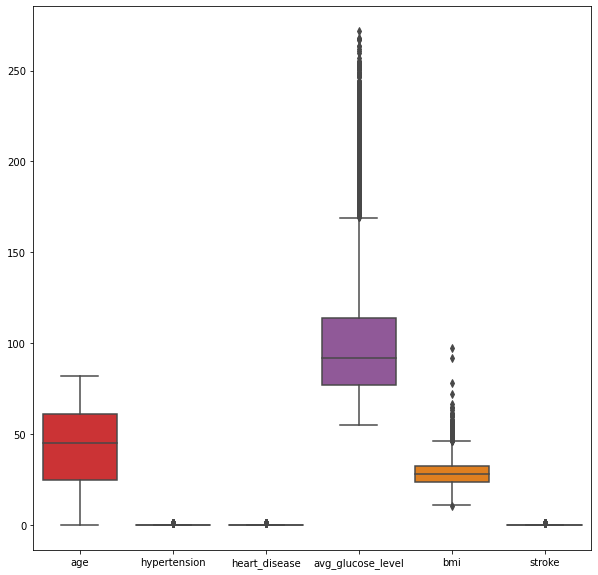

In [370]:
# checking for outliers 

fig, ax = plt.subplots(figsize = (10, 10))
sns.boxplot(data = data, palette = 'Set1')
plt.show();

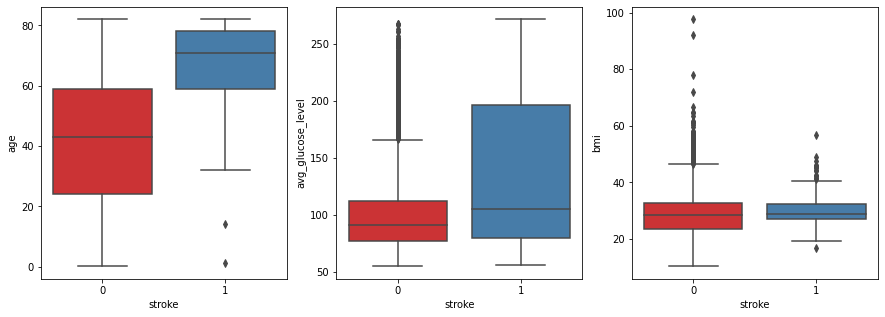

In [371]:

outlier_arr = ['age', 'avg_glucose_level', 'bmi']

fig, axs = plt.subplots(1, 3, figsize=(15,5))
axs = axs.flatten()

for i, col_name in enumerate(outlier_arr):
    sns.boxplot(x=data['stroke'], y=col_name, data= data, ax=axs[i],  palette = 'Set1')

In [372]:
data['bmi'].describe()


count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

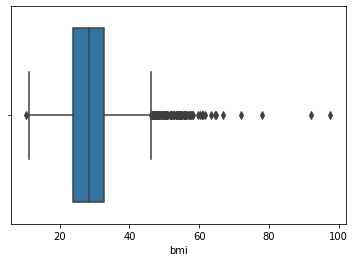

In [373]:
bmi_outliers=data.loc[data['bmi']>47]
bmi_outliers['bmi'].shape #check how many bmi outliers we have


temp = data.copy()
sns.boxplot(data=temp,x=temp['bmi'])


In [374]:
# removing outliers-
temp['bmi'] = pd.to_numeric(temp['bmi'])
temp['bmi'] = temp['bmi'].apply(lambda x: 47 if x>47 else x)

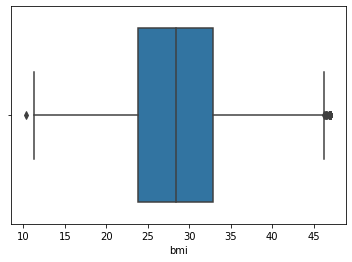

In [375]:
#print the bmi again and check their is no outliers

sns.boxplot(data=temp,x=temp['bmi'])

In [376]:
filtered_data=temp.copy()


In [377]:
# performing encoding (label encoding)

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

gender = encoder.fit_transform( filtered_data['gender'] )
smoking_status = encoder.fit_transform( filtered_data['smoking_status'] )
work_type = encoder.fit_transform( filtered_data['work_type'] )
Residence_type = encoder.fit_transform( filtered_data['Residence_type'] )
ever_married = encoder.fit_transform( filtered_data['ever_married'] )
filtered_data['work_type'] = work_type
filtered_data['Residence_type'] = Residence_type
filtered_data['smoking_status'] = smoking_status
filtered_data['gender'] = gender
filtered_data['ever_married'] = ever_married
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB


In [378]:
filtered_data.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [379]:
x = filtered_data.drop('stroke', axis = 1)
y = filtered_data['stroke']

from sklearn.model_selection import train_test_split

# splitting the dataset for train and test-
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
x_test.shape

(1022, 10)

In [380]:
filtered_data.describe()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.738129,1.376908,0.048728
std,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.161390,1.071534,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.400000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,47.000000,3.000000,1.000000


In [381]:
# Scaling the train and test features
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

x_train_std = std.fit_transform(x_train)
x_test_std = std.transform(x_test)


In [382]:
#Logistic regression-


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logistic_reg = LogisticRegression()

logistic_reg.fit(x_train_std, y_train)

y_pred_logistic_reg = logistic_reg.predict(x_test_std)

accuracy_logistic_reg = accuracy_score(y_test, y_pred_logistic_reg)
print("Logistic Regression accuracy = " +  str(accuracy_logistic_reg*100) + "%")

Logistic Regression accuracy = 94.71624266144813%


In [383]:
#SVM-

from sklearn.svm import SVC
svc = SVC()

svc.fit(x_train_std, y_train)

y_pred_svc = svc.predict(x_test_std)

ac_svc = accuracy_score(y_test, y_pred_svc)
print("SVM accuracy = " +  str(ac_svc*100) + "%")

SVM accuracy = 94.71624266144813%


In [390]:
#Decision tree-

from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

decision_tree.fit(x_train_std, y_train)

decision_tree.feature_importances_

array([0.04505728, 0.20077799, 0.03420359, 0.02100343, 0.00581771,
       0.03533076, 0.02881657, 0.29332933, 0.26733965, 0.06832369])

In [386]:
x_train.columns


Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [387]:
from sklearn.metrics import accuracy_score

y_pred_decision_tree = decision_tree.predict(x_test_std)

accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
print("decision tree accuracy = " +  str(accuracy_decision_tree*100) + "%")

decision tree accuracy = 91.6829745596869%


In [388]:
#K-Nearest-Neighbour

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(x_train_std, y_train)

y_pred_knn = knn.predict(x_test_std)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("K-nearest neighbour accuracy = " +  str(accuracy_knn*100) + "%")

K-nearest neighbour accuracy = 94.71624266144813%


In [389]:
import pickle

pickle.dump(logistic_reg, open('model.pkl', 'wb'))
pickle.dump(svc, open('model.pkl', 'wb'))
pickle.dump(knn, open('model.pkl', 'wb'))
pickle.dump(decision_tree, open('model.pkl', 'wb'))
